## <center><span style="color:green">Prueba Práctica – Simulador/ Modelador en Python 🎯 </span></center> 


### <span style="color:green">📚📚 Librerías</span>


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <span style="color:green">🅾️ a) Grafo asociado al modelo de la situación</span>

Sano (QoL: 100%)
  └── Infectado - Fase inicial (Días 0–10, QoL: 100%)
       ├── Sin tratamiento
       │    └── Crisis
       │         ├── Muere (15%, QoL: 0%)
       │         └── Sobrevive (85%)
       │              └── Post-crisis sin tratamiento (QoL: 90%)
       │
       ├── Tratamiento A
       │    └── Crisis
       │         ├── Muere (3%, QoL: 0%)
       │         └── Sobrevive (97%)
       │              └── Post-crisis con secuela (QoL: 88%)
       │                   └── Reducción permanente de 12%
       │
       └── Tratamiento B
            └── Crisis
                 ├── Muere (15%, QoL: 0%)
                 └── Sobrevive (85%)
                      └── Fase de tratamiento (QoL: -50%)
                           └── Post-crisis con secuela (QoL: 96%)
                                └── Reducción permanente de 4%


### <span style="color:green">🆎 b) Calibración del modelo y presentación de resultados</span>

,Estrategia,Probabilidad de muerte,Calidad en crisis,Calidad largo plazo,Utilidad esperada (QALYs)
0,Sin tratamiento,0.15,0.65,0.90,7.7
1,Tratamiento 1,0.03,0.88,0.88,8.6
2,Tratamiento 2,0.15,0.50,0.96,8.2


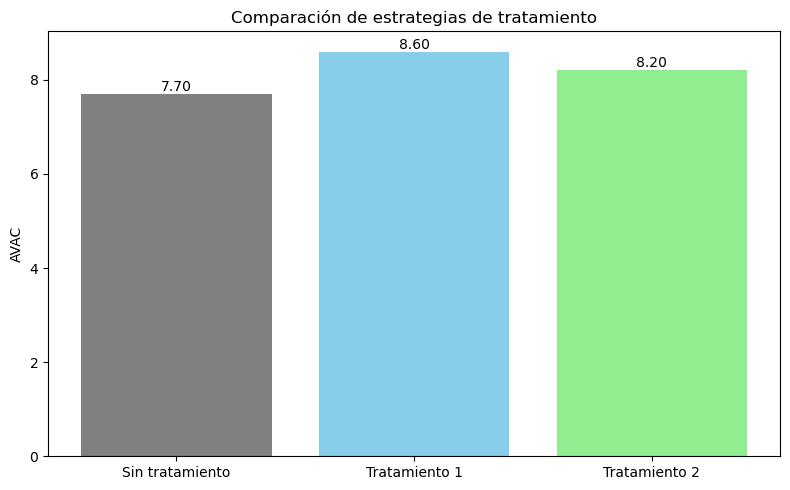

In [8]:
# Creamos una versión para Jupyter Notebook del modelo de decisión en salud terminal



# Parámetros base de las estrategias
estrategias = {
    'Sin tratamiento': {'p_muerte': 0.15, 'qv_crisis': 0.65, 'qv_largo_plazo': 0.90},
    'Tratamiento 1': {'p_muerte': 0.03, 'qv_crisis': 0.88, 'qv_largo_plazo': 0.88},
    'Tratamiento 2': {'p_muerte': 0.15, 'qv_crisis': 0.50, 'qv_largo_plazo': 0.96},
}

# Función para calcular la utilidad esperada (QALYs)
def calcular_utilidad(p_muerte, qv_crisis, qv_largo):
    dur_leve = 10 / 365
    dur_crisis = 14 / 365
    dur_largo = 10  # años
    utilidad = dur_leve + (1 - p_muerte) * (dur_crisis * qv_crisis + dur_largo * qv_largo)
    return utilidad

# Calcular utilidades esperadas
resultados = []
for nombre, p in estrategias.items():
    utilidad = calcular_utilidad(p['p_muerte'], p['qv_crisis'], p['qv_largo_plazo'])
    resultados.append({
        'Estrategia': nombre,
        'Probabilidad de muerte': p['p_muerte'],
        'Calidad en crisis': p['qv_crisis'],
        'Calidad largo plazo': p['qv_largo_plazo'],
        'Utilidad esperada (QALYs)': round(utilidad, 2)
    })

df_resultados = pd.DataFrame(resultados)

# Graficar resultados
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(df_resultados['Estrategia'], df_resultados['Utilidad esperada (QALYs)'], color=['gray', 'skyblue', 'lightgreen'])
ax.set_ylabel('AVAC')
ax.set_title('Comparación de estrategias de tratamiento')
ax.bar_label(bars, fmt='%.2f')
plt.tight_layout()

# Mostrar DataFrame
df_resultados



### 🏆 Resultado
### Tratamiento 1 resulta ser el mejor con 8.6 AVAC, gracias a su reducción en la mortalidad y afectación moderada en calidad de vida.

### <span style="color:green">🔁 c) Análisis de sensibilidad (±10%)</span>


p_muerte

qv_crisis

qv_largo_plazo

In [12]:
import pandas as pd
import numpy as np

# Escenarios: -10%, Base, +10%
escenarios = ["-10%", "Base", "+10%"]

# Parámetros por escenario
parametros = {
    "p_muerte_no_trat": [0.135, 0.15, 0.165],
    "p_muerte_trat1": [0.027, 0.03, 0.033],
    "p_muerte_trat2": [0.135, 0.15, 0.165],  # igual que sin tratamiento
    "u_post_no_trat": [0.81, 0.90, 0.99],
    "u_post_trat1": [0.792, 0.88, 0.968],
    "u_post_trat2": [0.864, 0.96, 1.0],
    "reduccion_crisis_trat1": [0.108, 0.12, 0.132],
    "reduccion_crisis_trat2": [0.45, 0.5, 0.55]
}

# Supuestos de duración
t_crisis = 14 / 365.25  # tiempo en crisis (en años)
t_post = 10  # tiempo post-crisis (en años)

# Función para calcular QALYs esperados
def calcular_qalys(p_muerte, u_crisis, u_post):
    sobrevivencia = 1 - p_muerte
    qalys_crisis = u_crisis * t_crisis
    qalys_post = u_post * t_post * sobrevivencia
    return qalys_crisis + qalys_post

# Construcción de resultados
resultados = []

for i, esc in enumerate(escenarios):
    # Sin tratamiento
    qalys_nt = calcular_qalys(
        p_muerte=parametros["p_muerte_no_trat"][i],
        u_crisis=1,  # sin reducción durante crisis
        u_post=parametros["u_post_no_trat"][i]
    )
    # Tratamiento 1
    qalys_t1 = calcular_qalys(
        p_muerte=parametros["p_muerte_trat1"][i],
        u_crisis=1 - parametros["reduccion_crisis_trat1"][i],
        u_post=parametros["u_post_trat1"][i]
    )
    # Tratamiento 2
    qalys_t2 = calcular_qalys(
        p_muerte=parametros["p_muerte_trat2"][i],
        u_crisis=1 - parametros["reduccion_crisis_trat2"][i],
        u_post=parametros["u_post_trat2"][i]
    )
    
    resultados.append({
        "Escenario": esc,
        "Sin tratamiento": round(qalys_nt,1),
        "Tratamiento 1": round (qalys_t1,1),
        "Tratamiento 2": round(qalys_t2,1)
    })

df_resultados = pd.DataFrame(resultados)
df_resultados


,Escenario,Sin tratamiento,Tratamiento 1,Tratamiento 2
0,-10%,7.0,7.7,7.5
1,Base,7.7,8.6,8.2
2,+10%,8.3,9.4,8.4


### <span style="color:green">📰📰 Cambiando a formato tabular</span>

In [14]:
df_largo = df_resultados.melt(
    id_vars='Escenario',
    var_name='Estrategia',
    value_name='Valor'
)

df_largo

,Escenario,Estrategia,Valor
0,-10%,Sin tratamiento,7.0
1,Base,Sin tratamiento,7.7
2,+10%,Sin tratamiento,8.3
3,-10%,Tratamiento 1,7.7
4,Base,Tratamiento 1,8.6
5,+10%,Tratamiento 1,9.4
6,-10%,Tratamiento 2,7.5
7,Base,Tratamiento 2,8.2
8,+10%,Tratamiento 2,8.4


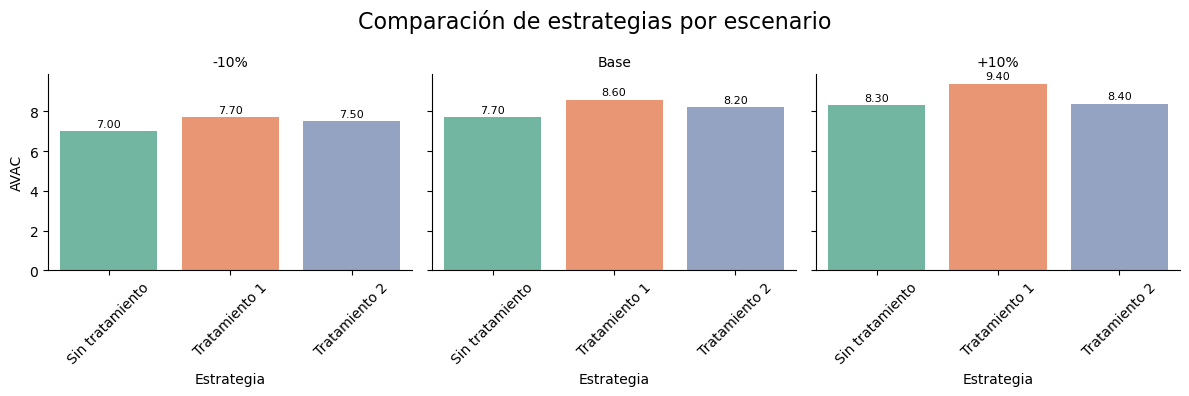

In [30]:
# Crear el catplot
g = sns.catplot(
    data=df_largo,
    kind='bar',
    x='Estrategia',
    y='Valor',
    hue='Estrategia',
    col='Escenario',
    palette='Set2',
    height=4,
    aspect=1
)

# Añadir etiquetas a cada barra
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=2, fontsize=8)

# Ajustes estéticos
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Estrategia", "AVAC")
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Comparación de estrategias por escenario", fontsize=16)

plt.tight_layout()
plt.show()


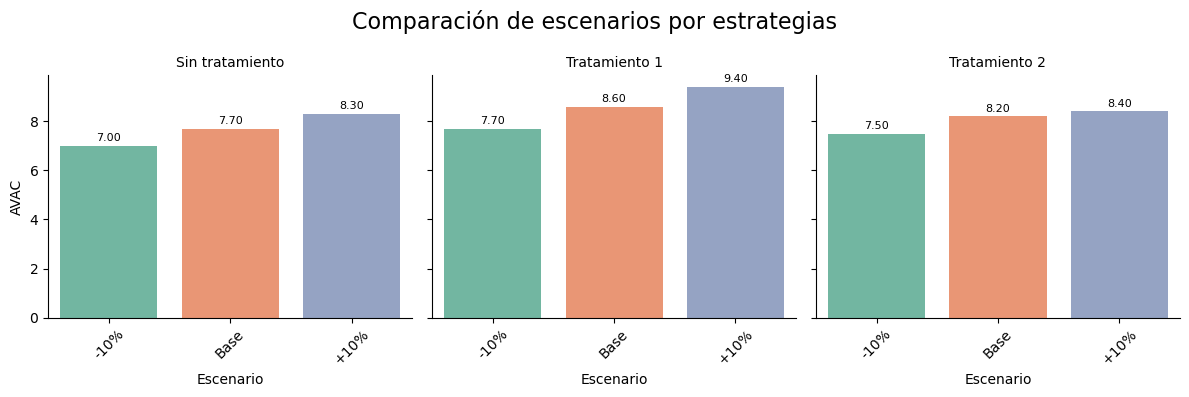

In [34]:
# Crear el catplot
g = sns.catplot(
    data=df_largo,
    kind='bar',
    x='Escenario',
    y='Valor',
    hue='Escenario',
    col='Estrategia',
    palette='Set2',
    height=4,
    aspect=1
)

# Añadir etiquetas a cada barra
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=2, fontsize=8)

# Ajustes estéticos
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Escenario", "AVAC")
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Comparación de escenarios por estrategias", fontsize=16)

plt.tight_layout()
plt.show()



### <span style="color:green">🏆 Conclusiones finales</span>

* *Variando en un 10 % los parámetros,la decisión de optar por el tratamiento 1 se mantiene, ya que la calidad de vida durante la crisis y a largo plazo se mantiene (88 %)*

* *Dentro del cálculo de los años de vida ajustados por calidad de vida (AVAC), se incluye la probabilidad de muerte, aunque en todos los casos el resultado es cero, ya que, aunque el ejercicio no lo considera, podría ser un valor negativo si el paciente considera que estar vivo en condiciones críticas es peor que morir*